In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Position_Salaries.csv to Position_Salaries.csv


#IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataset= pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


#HANDLING CATEGORICAL DATA

In [ ]:
from sklearn.preprocessing import LabelEncoder
x = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values 
labelencoder_X = LabelEncoder()
x[:,0] = labelencoder_X.fit_transform(x[:,0])
x[:,1] = labelencoder_X.fit_transform(x[:,1])
print(x)

[[0 0]
 [4 1]
 [8 2]
 [5 3]
 [3 4]
 [7 5]
 [6 6]
 [9 7]
 [1 8]
 [2 9]]


#GRAPHS

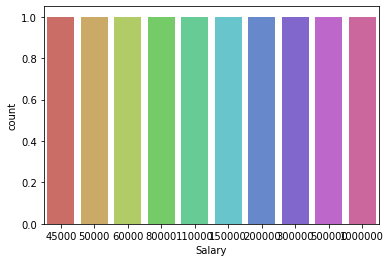

In [ ]:
seaborn.countplot(x='Salary',data=dataset, palette='hls')
plt.show()

#SPLITTING OF DATASET INTO TRAIN AND TEST SET

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size = 0.25, random_state = 0)

#NORMALIZING DATA

In [ ]:
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

#ALGORITHM

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

#FITTING OF TRAINING DATA

In [ ]:
regressor.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [ ]:
Y_Pred = regressor.predict(X_Test)

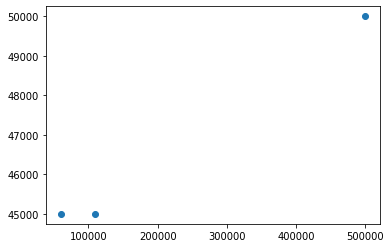

In [ ]:
plt.scatter(Y_Test,Y_Pred)

#EVALUATION

In [ ]:
print(metrics.accuracy_score(Y_Test, Y_Pred))

0.0


#SAVING THE MODEL USING PICKLE LIBRARY

In [ ]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(regressor) 

# Load the pickled model 
model_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
model_from_pickle.predict(X_Test) 


array([45000., 50000., 45000.])

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix

In [ ]:
Y_Train = Y_Train[0:3]
results =confusion_matrix(Y_Train, Y_Pred)
print(results)

[[0 0 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [1 0 0 0]]


Precision, Recall, Support, Fscore

In [ ]:

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_Train,Y_Pred, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.25, 0.25, 0.25, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [ ]:

results =confusion_matrix(Y_Test, Y_Pred)
print(results)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]]


Precision, Recall, Support, Fscore

In [ ]:

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_Test, Y_Pred, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0, 0.0, None)